In [ ]:
a="2"
type(2)

int

**Listas**

Es un vector de objetps, los elementos de una lista pueden ser de cualquier tipo

In [ ]:
l=[0,1,2,3]
print(type(l))
print(l)

<class 'list'>
[0, 1, 2, 3]


In [ ]:
l[3]

3

**Filtrando Listas**

Recordar que el índice inicia en 0


In [ ]:
print(l[:])
print(l[0:2])
print(l[::2])

In [ ]:
print(l[:])

[0, 1, 2, 3]


In [ ]:
l

[0, 1, 2, 3]

In [ ]:
print(l[0:3])

[0, 1, 2]


In [ ]:
print(l[::2])

[0, 2]


No todos los elementos tienen que ser iguales


In [ ]:
l = [1, 'a', 1.0]

In [ ]:
l

[1, 'a', 1.0]

Pueden haber listas anidadas

In [ ]:
nested_list = [1, [2, [3, [4, [5]]]]]
nested_list

[1, [2, [3, [4, [5]]]]]

In [ ]:
inicio = 1
final = 16
paso = 2

l2=list(range(inicio, final, paso))

In [ ]:
l2


[1, 3, 5, 7, 9, 11, 13, 15]

In [ ]:
l2[0]

1

**Creación de una lista vacía**

In [ ]:
l = []

# Adición de elementos usando `append`
l.append("A")
l.append("d")
l.append("d")

print(l)

['A', 'd', 'd']


**Modificar elemnetos de una lista**


In [ ]:
l[1] = "p"
l[2] = "t"

print(l)

['A', 'p', 't']


**Insertar elementos a una lsita**

In [ ]:
l = []

l.insert(0, "i")
l.insert(1, "n")
l.insert(2, "s")
l.insert(3, "e")
l.insert(4, "r")
l.insert(5, "t")

print(l)

['i', 'n', 's', 'e', 'r', 't', 'A', 'p', 't']


**Remover un elmento**


In [ ]:
l.remove("A")

print(l)

['i', 'n', 's', 'e', 'r', 't', 'p', 't']


In [ ]:
# Por posición
del l[7]
del l[6]

print(l)

['i', 'n', 's', 'e', 'r', 't']


**Tuplas**

Las tuplas son como las listas, excepto que estas no pueden ser modificadas una vez se han creado, es decir, son inmutables.

En Python, las tuplas son creadas usando la sintaxis (..., ..., ...).


In [ ]:
point = (10, 20,'a')

print(type(point))
print(point)

<class 'tuple'>
(10, 20, 'a')


In [ ]:
point[0]

10

Genera error al intentar modificar la tupla

In [ ]:
try:
    point[0] = 20
except(TypeError) as er:
    print("TypeError:", er)
else:
    raise

TypeError: 'tuple' object does not support item assignment


**Diccionarios**

Los diccionarios son también parecidos a las listas, excepto que cada elemento es una pareja clave-valor. La sintaxis en los diccionarios es de la forma {key1 : value1, ...}:


In [ ]:
params = {"parameter1" : 1.0,
          "parameter2" : 2.0,
          "parameter3" : 3.0,}

print(type(params))
print(params)

<class 'dict'>
{'parameter1': 1.0, 'parameter2': 2.0, 'parameter3': 3.0}


Se accede a los elementos por la llave

In [ ]:
params["parameter3"]

3.0

In [ ]:
print("parameter1 = " + str(params["parameter1"]))
print("parameter2 = " + str(params["parameter2"]))
print("parameter3 = " + str(params["parameter3"]))

parameter1 = 1.0
parameter2 = 2.0
parameter3 = 3.0


In [ ]:
#Adicionar elemento
params["parameter4"] = "D"

**MACHINE LEARNING**

**Se utiliza la metodología Crisp DM:**

1. Entender el negocio
2. Entender los datos, que variables tengo, que variables me sirven
3. Procesar los datos, eliminar outliers, tratamiento de Nulos
4. Elegir y desarrollar el modelo 
5. Colocar el modelo en producción (no aplica en este caso)


**1. Entender el Negocio**

El archivo train.csv contiene información sobre muchas transacciones con tarjetas de crédito y débito por diferentes canales. Para cada transacción se tiene el valor monetario de la misma y otras variables (ver diccionario_variables.xlsx). De particular importancia es la variable FRAUDE en donde aparece 1 si la transacción constituyó un fraude o 0 si fue una transacción legítima. El objetivo es desarrollar un modelo que permita, a partir de los datos en este archivo predecir cuál será el valor de la variable FRAUDE para una transacción cualquiera. El archivo test.csv contiene exactamente las mismas columnas de train.csv, la columna FRAUDE la dejamos en blanco.
1. Cargue el archivo train.csv y Construya un modelo que capaz de realizar predicciones de FRAUDE.
2. Enviar un archivo test_evaluado.csv con todas las columnas en el mismo orden que se encuentran en test.csv y adicionalmente la columna FRAUDE poblada con el valor predicho por su modelo. Cualquier valor real (es decir, fraccionario) entre 0 y 1 será admisible aquí, donde 1 debe corresponder a FRAUDE y 0 a transacción legítima.

**2. Exploración de Datos**


In [ ]:
# Se importan las librerias necesarias para el desarrollo del ejercicio

import pandas as pd
import numpy as np
import io
from google.colab import files
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Cargar archivo desde el PC
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
# se lee el archivo csv, usando pandas: train.csv, Luego se crea el dataframe a partir del archivo
archivo = io.BytesIO(uploaded['train.csv'])
df=pd.read_csv('train.csv')

In [ ]:
# Se realiza una muestra del archivo
df.head()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,9000000001,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
1,9000000002,1,0.0,17,594.77,ATM_INT,20150515,US,ATM_INT,5,15,20050415.0,716.0,M,Personal Plus,29.0,5643700.0,500000.0,1,NaN,NaN,NaN,5,289.99,4552.41,2029.90
2,9000000003,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
3,9000000004,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
4,9000000005,1,0.0,0,1.00,ATM_INT,20150510,CR,ATM_INT,0,10,20141009.0,788.0,M,Personal,25.0,0.0,0.0,1,NaN,NaN,NaN,1,NaN,1482.35,1.00


In [ ]:
# Se verifica las columnas existentes en el dataframe
df.columns

Index(['id', 'FRAUDE', 'VALOR', 'HORA_AUX', 'Dist_max_NAL', 'Canal1', 'FECHA',
       'COD_PAIS', 'CANAL', 'DIASEM', 'DIAMES', 'FECHA_VIN', 'OFICINA_VIN',
       'SEXO', 'SEGMENTO', 'EDAD', 'INGRESOS', 'EGRESOS', 'NROPAISES',
       'Dist_Sum_INTER', 'Dist_Mean_INTER', 'Dist_Max_INTER', 'NROCIUDADES',
       'Dist_Mean_NAL', 'Dist_HOY', 'Dist_sum_NAL'],
      dtype='object')

In [ ]:
# Se Verifican el porcentaje de los datos que están nulos 
df.isnull().sum()/len(df)*100

id                  0.000000
FRAUDE              0.000000
VALOR               0.000000
HORA_AUX            0.000000
Dist_max_NAL        0.000000
Canal1              0.000000
FECHA               0.000000
COD_PAIS            0.000000
CANAL               0.000000
DIASEM              0.000000
DIAMES              0.000000
FECHA_VIN           0.842697
OFICINA_VIN         0.842697
SEXO                1.931180
SEGMENTO            0.842697
EDAD                0.842697
INGRESOS            0.842697
EGRESOS             0.842697
NROPAISES           0.000000
Dist_Sum_INTER     52.492978
Dist_Mean_INTER    52.492978
Dist_Max_INTER     52.492978
NROCIUDADES         0.000000
Dist_Mean_NAL      15.028090
Dist_HOY            0.000000
Dist_sum_NAL        0.000000
dtype: float64

Se puede verificar que hay variables en las cuales los valores Nulos son la mitad de los datos

In [ ]:
# Se verifica el tipo de datos
df.dtypes

id                   int64
FRAUDE               int64
VALOR              float64
HORA_AUX             int64
Dist_max_NAL       float64
Canal1              object
FECHA                int64
COD_PAIS            object
CANAL               object
DIASEM               int64
DIAMES               int64
FECHA_VIN          float64
OFICINA_VIN        float64
SEXO                object
SEGMENTO            object
EDAD               float64
INGRESOS           float64
EGRESOS            float64
NROPAISES            int64
Dist_Sum_INTER     float64
Dist_Mean_INTER    float64
Dist_Max_INTER     float64
NROCIUDADES          int64
Dist_Mean_NAL      float64
Dist_HOY           float64
Dist_sum_NAL       float64
dtype: object

**Estadísticos**

In [ ]:
df.mean()

id                 6.966041e+09
FRAUDE             2.489466e-01
VALOR              5.052533e+05
HORA_AUX           1.494277e+01
Dist_max_NAL       3.180323e+02
FECHA              2.015051e+07
DIASEM             3.154846e+00
DIAMES             1.351615e+01
FECHA_VIN          2.001068e+07
OFICINA_VIN        4.147670e+02
EDAD               3.981268e+01
INGRESOS           1.433599e+07
EGRESOS            8.485727e+06
NROPAISES          1.760534e+00
Dist_Sum_INTER     1.736327e+04
Dist_Mean_INTER    4.160744e+03
Dist_Max_INTER     5.006742e+03
NROCIUDADES        3.961025e+00
Dist_Mean_NAL      1.971824e+02
Dist_HOY           4.379452e+03
Dist_sum_NAL       1.788926e+03
dtype: float64

In [ ]:
df.sum()

id                                                    19839283714665
FRAUDE                                                           709
VALOR                                                    1.43896e+09
HORA_AUX                                                       42557
Dist_max_NAL                                                  905756
Canal1             ATM_INTATM_INTATM_INTATM_INTATM_INTATM_INTATM_...
FECHA                                                    57388662494
COD_PAIS           USUSUSUSCRUSCRUSUSPACRUSUSUSUSUSFJUSUSUSUSUSUS...
CANAL              ATM_INTATM_INTATM_INTATM_INTATM_INTATM_INTATM_...
DIASEM                                                          8985
DIAMES                                                         38494
FECHA_VIN                                                5.65101e+10
OFICINA_VIN                                               1.1713e+06
EDAD                                                          112431
INGRESOS                          

In [ ]:
df.max()

id                 93300501209
FRAUDE                       1
VALOR              2.00141e+07
HORA_AUX                    23
Dist_max_NAL           1310.46
Canal1                     POS
FECHA                 20150531
COD_PAIS                    UY
CANAL                      POS
DIASEM                       6
DIAMES                      31
FECHA_VIN          2.01504e+07
OFICINA_VIN                967
EDAD                       133
INGRESOS           1.94007e+09
EGRESOS                1.6e+09
NROPAISES                    9
Dist_Sum_INTER          758838
Dist_Mean_INTER        16328.8
Dist_Max_INTER         17780.3
NROCIUDADES                 20
Dist_Mean_NAL          1217.57
Dist_HOY               21991.2
Dist_sum_NAL           18832.1
dtype: object

In [ ]:
df.median()

id                 6.180047e+09
FRAUDE             0.000000e+00
VALOR              2.435912e+05
HORA_AUX           1.600000e+01
Dist_max_NAL       2.436200e+02
FECHA              2.015052e+07
DIASEM             3.000000e+00
DIAMES             1.500000e+01
FECHA_VIN          2.002017e+07
OFICINA_VIN        3.600000e+02
EDAD               3.800000e+01
INGRESOS           5.500000e+06
EGRESOS            1.781000e+06
NROPAISES          1.000000e+00
Dist_Sum_INTER     9.104820e+03
Dist_Mean_INTER    4.552410e+03
Dist_Max_INTER     4.552410e+03
NROCIUDADES        3.000000e+00
Dist_Mean_NAL      1.291950e+02
Dist_HOY           4.552410e+03
Dist_sum_NAL       8.838100e+02
dtype: float64

In [ ]:
Q1 = df['EGRESOS'].quantile(0.25)
Q3 = df['EGRESOS'].quantile(0.75)

In [ ]:
#Se hace la descripción de los estadísticos de las variables
pd.options.display.float_format = "{:.2f}".format
df.describe(include='all')

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
count,2848.00,2848.00,2848.00,2848.00,2848.00,2848,2848.00,2848,2848,2848.00,2848.00,2824.00,2824.00,2793,2824,2824.00,2824.00,2824.00,2848.00,1353.00,1353.00,1353.00,2848.00,2420.00,2848.00,2848.00
unique,nan,nan,nan,nan,nan,2,nan,29,3,nan,nan,nan,nan,2,6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,nan,nan,nan,POS,nan,US,MCI,nan,nan,nan,nan,M,Personal Plus,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,nan,nan,nan,nan,2231,nan,2443,1141,nan,nan,nan,nan,1415,1481,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,6966040630.15,0.25,505253.34,14.94,318.03,NaN,20150513.52,NaN,NaN,3.15,13.52,20010675.93,414.77,NaN,NaN,39.81,14335988.21,8485726.97,1.76,17363.27,4160.74,5006.74,3.96,197.18,4379.45,1788.93
std,9837087827.06,0.43,1002346.58,6.35,296.86,NaN,9.14,NaN,NaN,2.09,9.14,91031.48,290.06,NaN,NaN,12.99,57307817.25,62881590.71,1.04,25491.48,1817.71,2693.51,2.75,192.77,1791.31,2422.16
min,2364560.00,0.00,0.00,0.00,1.00,NaN,20150501.00,NaN,NaN,0.00,1.00,19111111.00,1.00,NaN,NaN,0.00,0.00,0.00,1.00,904.81,904.81,904.81,1.00,4.48,904.81,1.00
25%,2624229995.50,0.00,88853.27,12.00,25.02,NaN,20150504.00,NaN,NaN,1.00,4.00,19951124.00,167.00,NaN,NaN,30.00,2500000.00,500000.00,1.00,6474.20,3178.21,4552.41,2.00,61.02,4552.41,148.59
50%,6180047001.00,0.00,243591.25,16.00,243.62,NaN,20150515.00,NaN,NaN,3.00,15.00,20020168.00,360.00,NaN,NaN,38.00,5500000.00,1781000.00,1.00,9104.82,4552.41,4552.41,3.00,129.19,4552.41,883.81
75%,9000000101.25,0.00,500029.08,20.00,604.69,NaN,20150521.00,NaN,NaN,5.00,21.00,20081033.00,659.00,NaN,NaN,47.00,12500000.00,4377500.00,2.00,20435.63,4552.41,4552.41,5.00,271.42,4552.41,2576.86


** Actividad: Generar una conclusión sobre los datos presentados

**Visualización de datos**


In [ ]:
# Se verifica como se comporta la variable target
df["FRAUDE"].value_counts()

0    2139
1     709
Name: FRAUDE, dtype: int64

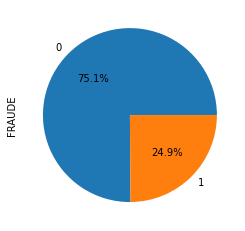

In [ ]:
# Pandas también posee algunas propiedades que permiten realizar gráficos directamente desde el dataframe
df["FRAUDE"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

Se verifica como están balanceadas las clases, se percibe que hay un desbalanceo considerable dado que la variable fraude esta sesgada hacia el 0

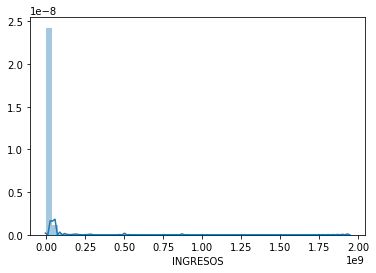

In [ ]:
sns.distplot( df["INGRESOS"] )


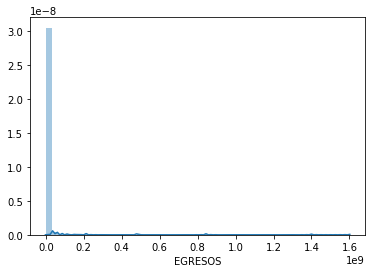

In [ ]:
sns.distplot( df["EGRESOS"] )

In [ ]:
trx = df[['HORA_AUX', 'DIAMES', 'EGRESOS']]
t2=trx.groupby(by=['DIAMES','HORA_AUX' ]).sum()


In [ ]:
# se debe realizar 2 veces para el indice quede creado correctamente
t2.reset_index(level=0, inplace=True)
t2.reset_index(level=0, inplace=True)

In [ ]:
t2

,HORA_AUX,DIAMES,EGRESOS
0,0,1,7000000.00
1,1,1,20000000.00
2,2,1,12000000.00
3,3,1,10000000.00
4,4,1,15200000.00
...,...,...,...
532,23,30,7700000.00
533,1,31,2800000.00
534,17,31,850000.00
535,22,31,0.00


In [ ]:
t2 = t2.pivot(index="HORA_AUX", columns="DIAMES", values="EGRESOS")

In [ ]:
t2

DIAMES,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
HORA_AUX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7000000.00,8000000.00,35200000.00,301573056.00,nan,22300000.00,6000000.00,nan,300000.00,0.00,4700000.00,1400000.00,98801500.00,3000000.00,108945112.00,2684666.00,89227567.00,11100000.00,58460000.00,127423000.00,218408500.00,nan,400000.00,9800000.00,nan,3000000.00,nan,nan,nan,8000000.00,nan
1,20000000.00,750000.00,83200000.00,nan,2700000.00,42600000.00,50000.00,nan,11500000.00,0.00,nan,nan,nan,nan,15000000.00,3700000.00,8720000.00,6400000.00,1100000.00,2500000.00,23727000.00,5509222.00,2000000.00,11500000.00,nan,nan,nan,1900000.00,400000.00,800000.00,2800000.00
2,12000000.00,nan,75000000.00,nan,6400000.00,30500000.00,3000000.00,nan,nan,400000.00,nan,nan,nan,nan,300000.00,nan,33500000.00,nan,18300000.00,35641000.00,nan,nan,nan,5000000.00,350000.00,7500000.00,16000000.00,800000.00,900000.00,15000000.00,nan
3,10000000.00,3000000.00,8000000.00,nan,10500000.00,3750000.00,nan,nan,nan,300000.00,nan,nan,nan,nan,0.00,4184666.00,0.00,2000000.00,nan,nan,214727500.00,8000000.00,nan,nan,7000000.00,nan,0.00,nan,1500000.00,1200000.00,nan
4,15200000.00,nan,5200000.00,nan,15000000.00,nan,nan,nan,nan,nan,nan,nan,nan,600000.00,900000.00,6950000.00,600000.00,nan,nan,19218000.00,5000000.00,1000000.00,nan,nan,600000.00,nan,nan,nan,nan,nan,nan
5,8400000.00,nan,11400000.00,nan,nan,nan,8800000.00,nan,nan,nan,nan,nan,13600000.00,nan,6700000.00,nan,nan,nan,nan,16423000.00,nan,42880000.00,2000000.00,nan,7000000.00,nan,0.00,nan,700000.00,nan,nan
6,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,1350000.00,nan,9000000.00,18200000.00,nan,3000000.00,200000.00,nan,8000000.00,3000000.00,nan,nan,nan,5200000.00,nan,1600000.00,nan,1600000.00,nan,nan,nan
7,600000.00,nan,nan,nan,nan,3500000.00,nan,nan,nan,600000.00,nan,nan,nan,nan,nan,nan,4500000.00,12000000.00,nan,nan,23578388.00,nan,nan,2000000.00,nan,nan,nan,0.00,nan,nan,nan
8,nan,966166000.00,4600000.00,nan,nan,1300000.00,3000000.00,nan,nan,nan,16000000.00,7800000.00,2000000.00,nan,4920000.00,nan,nan,5000000.00,23000000.00,nan,16578388.00,6000000.00,nan,6000000.00,nan,nan,nan,2000000.00,nan,nan,nan


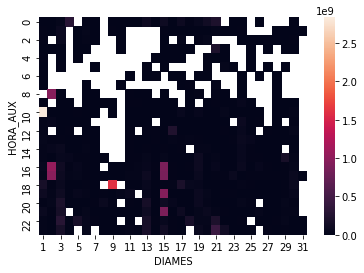

In [ ]:
ax = sns.heatmap(t2)

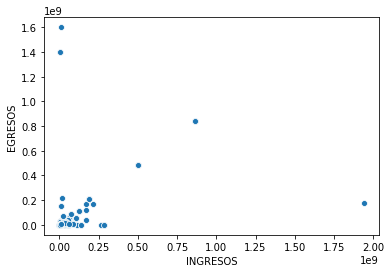

In [ ]:

sns.scatterplot(x="INGRESOS",y="EGRESOS" ,data=df)

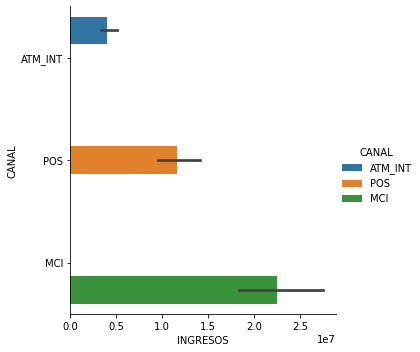

In [ ]:
sns.catplot(x = "INGRESOS", y = "CANAL", kind = "bar", data = df, hue = "CANAL");

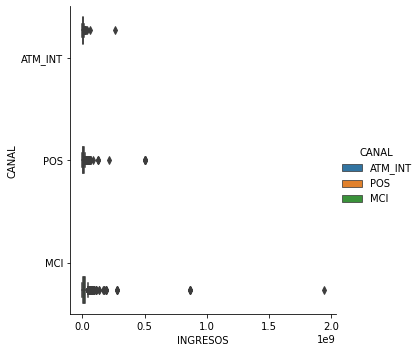

In [ ]:
sns.catplot(x = "INGRESOS", y = "CANAL", kind = "box", data = df, hue = "CANAL");

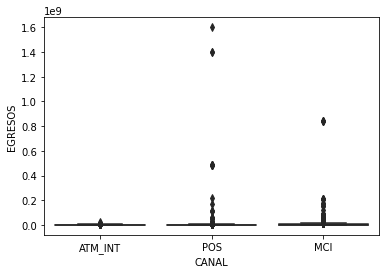

In [ ]:
sns.boxplot(x="CANAL", y="EGRESOS",palette=["m", "g"],data=df)

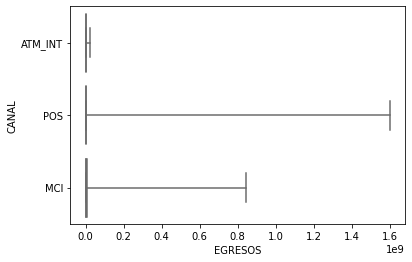

In [ ]:
sns.boxplot(x="EGRESOS", y="CANAL", data=df,
            whis=[0, 100], palette="vlag")

**Correlación**

Se verifica que las variables no estén correlacionadas entre sí, y evitar la redundancia

In [ ]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,FECHA,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
id,1.000000,0.030034,0.013274,0.030790,-0.026453,-0.027487,0.012703,-0.027487,0.176408,0.018065,-0.209451,-0.017056,-0.024605,-0.045057,0.007791,-0.003752,-0.009311,-0.044508,0.028757,-0.025183,-0.038702
FRAUDE,0.030034,1.000000,0.092562,-0.066042,0.060790,0.017678,0.127857,0.017678,0.161193,-0.048103,-0.079417,-0.050079,-0.052515,-0.091401,-0.104555,-0.035528,-0.070877,-0.084353,0.153994,-0.000995,-0.010075
VALOR,0.013274,0.092562,1.000000,0.077772,0.017471,0.058301,0.094815,0.058301,-0.070048,0.027524,0.034093,0.062181,0.025678,0.096054,-0.000165,-0.009296,0.003499,-0.031329,0.048938,0.011185,0.011614
HORA_AUX,0.030790,-0.066042,0.077772,1.000000,-0.018617,-0.013867,0.077576,-0.013867,0.007872,0.004774,-0.002737,0.031243,0.002080,0.048478,-0.029035,-0.015510,-0.012507,-0.039441,-0.012862,0.018499,-0.025502
Dist_max_NAL,-0.026453,0.060790,0.017471,-0.018617,1.000000,-0.038674,-0.010944,-0.038674,-0.079964,0.079182,-0.021966,0.039010,-0.034762,0.078245,0.091357,0.010917,0.061767,0.465416,0.713637,0.012460,0.671094
FECHA,-0.027487,0.017678,0.058301,-0.013867,-0.038674,1.000000,0.132031,1.000000,0.049981,-0.027268,-0.009714,-0.001777,-0.037749,0.050411,0.057997,-0.037138,0.013469,0.004813,-0.095202,0.042573,-0.024766
DIASEM,0.012703,0.127857,0.094815,0.077576,-0.010944,0.132031,1.000000,0.132031,0.025701,0.057805,0.010370,0.023578,0.055334,0.004613,0.034037,0.024475,0.046697,-0.048587,-0.005462,0.003241,-0.036911
DIAMES,-0.027487,0.017678,0.058301,-0.013867,-0.038674,1.000000,0.132031,1.000000,0.049981,-0.027268,-0.009714,-0.001777,-0.037749,0.050411,0.057997,-0.037138,0.013469,0.004813,-0.095202,0.042573,-0.024766
FECHA_VIN,0.176408,0.161193,-0.070048,0.007872,-0.079964,0.049981,0.025701,0.049981,1.000000,-0.064271,-0.515644,-0.146120,-0.100308,-0.115342,0.036948,0.047889,-0.007091,-0.095591,0.012577,-0.008768,-0.124853
OFICINA_VIN,0.018065,-0.048103,0.027524,0.004774,0.079182,-0.027268,0.057805,-0.027268,-0.064271,1.000000,0.055706,0.028538,-0.011557,0.028473,-0.049259,-0.063154,-0.017000,0.001639,0.067764,-0.086674,0.024326


Se puede observar que las variables Dist_max_NAL y Dist_sum_NAL, están altamente correlacionadas, por lo tanto se puede elimianar cualquiera de las dos


**3. Preprocesamiento de los datos**

In [ ]:
# Se eliminan las variables que no le aportan al modelo, ya que evitan la generalización del mismo
del df['id']


Borrar registros Duplicados por la columna edad

In [ ]:
# Es una muestra para tener de ejemplo cómo eliminamos datos duplicados, NO EJECUTAR
df.drop_duplicates(subset=['EDAD'],keep='last')

,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
263,0,259063.84,19,61.45,ATM_INT,20150524,US,ATM_INT,0,24,20141203.00,571.00,F,Personal Plus,18.00,1000000.00,500000.00,1,nan,nan,nan,2,61.45,4552.41,184.34
1067,1,143754.64,23,173.36,ATM_INT,20150523,CL,ATM_INT,6,23,20140718.00,262.00,F,Personal,21.00,500000.00,400000.00,2,4308.01,4308.01,4308.01,2,173.36,3782.13,693.44
1678,1,261529.60,5,1.00,ATM_INT,20150527,SV,ATM_INT,3,27,20140505.00,567.00,NaN,Emprendedor,19.00,2000000.00,0.00,1,nan,nan,nan,1,nan,2153.87,1.00
1804,0,301373.01,17,294.43,POS,20150502,US,POS,6,2,20030326.00,202.00,F,Personal Plus,70.00,1370307.00,0.00,2,47144.97,7857.49,7857.49,3,209.02,4552.41,836.08
1904,1,3326646.05,14,1.00,POS,20150523,US,POS,6,23,20140523.00,1.00,F,Personal,115.00,616000.00,1.00,2,4552.41,4552.41,4552.41,1,nan,4552.41,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,0,8414883.72,21,304.29,POS,20150513,US,MCI,3,13,19890407.00,967.00,F,Preferencial,0.00,10000000.00,5000000.00,6,28829.22,3203.25,4552.41,3,234.92,4552.41,1879.39
2844,0,84415.02,19,23.59,POS,20150523,US,POS,6,23,20140109.00,24.00,M,Personal Plus,31.00,1283000.00,500000.00,1,nan,nan,nan,2,23.59,4552.41,188.69
2845,0,84421.78,18,540.75,POS,20150519,US,MCI,2,19,19920505.00,850.00,M,Preferencial,46.00,58800000.00,4555000.00,1,nan,nan,nan,8,100.97,4552.41,5048.74
2846,0,84438.06,10,591.73,POS,20150522,US,POS,5,22,19970825.00,279.00,M,Personal Plus,47.00,3000000.00,1300000.00,1,nan,nan,nan,17,197.11,4552.41,10249.76


**A. Se eliminan columnas que presentan alta correlación**

In [ ]:
df = df.drop(columns = ['Dist_Max_INTER','Dist_max_NAL','INGRESOS','Dist_Sum_INTER', "NROCIUDADES"],axis = 1)
df.head()

,id,FRAUDE,VALOR,HORA_AUX,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_INTER,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,9000000001,1,0.0,13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1,NaN,474.94,4552.41,5224.36
1,9000000002,1,0.0,17,ATM_INT,20150515,US,ATM_INT,5,15,20050415.0,716.0,M,Personal Plus,29.0,500000.0,1,NaN,289.99,4552.41,2029.90
2,9000000003,1,0.0,13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1,NaN,474.94,4552.41,5224.36
3,9000000004,1,0.0,13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1,NaN,474.94,4552.41,5224.36
4,9000000005,1,0.0,0,ATM_INT,20150510,CR,ATM_INT,0,10,20141009.0,788.0,M,Personal,25.0,0.0,1,NaN,NaN,1482.35,1.00


**B. Outliers -Método Rango intercuartílico**


In [ ]:
# Se definen los cuartiles y luego el rango intercuartílico 
Q1 = df['EGRESOS'].quantile(0.25)
Q3 = df['EGRESOS'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Se calculan las formulas para realizar el filtro a los valores considerados outliers
ext_min= Q1 -(1.5*IQR)
ext_max= Q3 + (1.5*IQR)

In [ ]:
# Se filtran los valores atípicos, para esté ejercicio no se recomienda eliminarlos ¿ Por qué ?
df= df[(df['EGRESOS']< ext_min) | (df['EGRESOS'] > ext_max) ]

**C. Se imputan los valores nulos**

In [ ]:
df.FECHA_VIN.fillna(method='bfill', inplace = True) 

df.OFICINA_VIN.fillna(method='bfill', inplace = True) 

df.SEXO.fillna(method='bfill', inplace = True) 

df.SEGMENTO.fillna(method='bfill', inplace = True)

df.EDAD.fillna(df.EDAD.mean(), inplace = True)

df.EGRESOS.fillna(df.EGRESOS.mean(), inplace = True)

In [ ]:
df['Dist_Mean_INTER'].loc[df.Dist_Mean_INTER.isna()] = 0
df['Dist_Mean_NAL'].loc[df.Dist_Mean_NAL.isna()] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
# Todo lo que haya quedado Nulo, que ya debe ser poco, se procede a eliminarse
df=df.dropna()
df.reset_index(drop=True,inplace=True)
df.head()

,FRAUDE,VALOR,HORA_AUX,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_INTER,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,1,0.0,13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1,0.0,474.94,4552.41,5224.36
1,1,0.0,17,ATM_INT,20150515,US,ATM_INT,5,15,20050415.0,716.0,M,Personal Plus,29.0,500000.0,1,0.0,289.99,4552.41,2029.90
2,1,0.0,13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1,0.0,474.94,4552.41,5224.36
3,1,0.0,13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1,0.0,474.94,4552.41,5224.36
4,1,0.0,0,ATM_INT,20150510,CR,ATM_INT,0,10,20141009.0,788.0,M,Personal,25.0,0.0,1,0.0,0.00,1482.35,1.00


Se verifica nuevamente que no hayan valores Nulos

In [ ]:
df.isna().sum()

FRAUDE             0
VALOR              0
HORA_AUX           0
Canal1             0
FECHA              0
COD_PAIS           0
CANAL              0
DIASEM             0
DIAMES             0
FECHA_VIN          0
OFICINA_VIN        0
SEXO               0
SEGMENTO           0
EDAD               0
EGRESOS            0
NROPAISES          0
Dist_Mean_INTER    0
Dist_Mean_NAL      0
Dist_HOY           0
Dist_sum_NAL       0
dtype: int64

3. **Discretizar Variables:** Transformar las variables categóricas a numéricas

Los modelos por lo general no reciben variables de tipo categoricas, por lo tanto se deben transformar a variables numericas, esto se realiza con LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
le.fit(df['SEXO'])
df['SEXO'] = le.fit_transform(df['SEXO'])

le.fit(df['SEGMENTO'])
df['SEGMENTO'] = le.fit_transform(df['SEGMENTO'])

le.fit(df['COD_PAIS'])
df['COD_PAIS'] = le.fit_transform(df['COD_PAIS'])

le.fit(df['CANAL'])
df['CANAL'] = le.fit_transform(df['CANAL'])

le.fit(df['Canal1'])
df['Canal1'] = le.fit_transform(df['Canal1'])

df.head()

,FRAUDE,VALOR,HORA_AUX,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_INTER,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,1,0.00,14,0,20150526,5,0,2,26,20080409.00,210.00,1,4,29.00,310000.00,2,4308.01,342.47,1482.35,2739.72
1,1,0.00,18,0,20150513,5,0,3,13,20100624.00,17.00,0,4,26.00,1000000.00,3,4203.47,238.34,1482.35,476.68
2,0,0.00,21,0,20150521,9,0,4,21,20130608.00,424.00,1,3,22.00,200000.00,3,9890.57,57.26,20736.96,229.06
3,0,22997.00,11,1,20150502,21,2,6,2,20101001.00,582.00,0,4,27.00,2000000.00,2,4552.41,324.12,4552.41,2268.86
4,0,22997.00,11,1,20150502,21,2,6,2,20101001.00,582.00,0,4,27.00,2000000.00,2,4552.41,324.12,4552.41,2268.86


In [ ]:
le.classes_

array(['ATM_INT', 'POS'], dtype=object)

In [ ]:
df.columns

Index(['FRAUDE', 'VALOR', 'HORA_AUX', 'Canal1', 'FECHA', 'COD_PAIS', 'CANAL',
       'DIASEM', 'DIAMES', 'FECHA_VIN', 'OFICINA_VIN', 'SEXO', 'SEGMENTO',
       'EDAD', 'EGRESOS', 'NROPAISES', 'Dist_Mean_INTER', 'Dist_Mean_NAL',
       'Dist_HOY', 'Dist_sum_NAL'],
      dtype='object')

In [ ]:
# Luego de Discretizar se verifican nuevamente las correlaciones
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,FRAUDE,VALOR,HORA_AUX,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_INTER,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
FRAUDE,1.000000,0.092562,-0.066042,-0.521171,0.017678,-0.277852,-0.416398,0.127857,0.017678,0.156610,-0.047268,-0.056402,-0.069976,-0.079268,-0.052416,-0.091401,-0.092358,0.097719,-0.000995,-0.010075
VALOR,0.092562,1.000000,0.077772,0.038094,0.058301,-0.029475,-0.035402,0.094815,0.058301,-0.068691,0.029515,0.023410,0.001804,0.033948,0.025568,0.096054,0.054425,0.042186,0.011185,0.011614
HORA_AUX,-0.066042,0.077772,1.000000,0.001300,-0.013867,0.048182,-0.033415,0.077576,-0.013867,0.009651,0.006030,0.005744,-0.005545,-0.002726,0.002072,0.048478,0.038688,-0.018522,0.018499,-0.025502
Canal1,-0.521171,0.038094,0.001300,1.000000,0.033976,0.244235,0.810971,-0.067856,0.033976,-0.284611,0.073002,0.088513,0.240332,0.169855,0.059115,0.186810,0.212871,0.023322,0.038463,0.138398
FECHA,0.017678,0.058301,-0.013867,0.033976,1.000000,-0.125688,-0.003715,0.132031,1.000000,0.046347,-0.024291,0.024129,-0.079897,-0.009677,-0.037607,0.050411,-0.009299,-0.099023,0.042573,-0.024766
COD_PAIS,-0.277852,-0.029475,0.048182,0.244235,-0.125688,1.000000,0.167318,-0.036562,-0.125688,-0.090521,-0.004014,0.034597,0.008176,0.095703,-0.020173,-0.035940,0.042542,-0.009725,0.294368,0.030731
CANAL,-0.416398,-0.035402,-0.033415,0.810971,-0.003715,0.167318,1.000000,-0.042028,-0.003715,-0.129118,0.016549,0.034690,0.149160,0.088014,0.047165,0.086176,0.152957,-0.003962,-0.023729,0.062426
DIASEM,0.127857,0.094815,0.077576,-0.067856,0.132031,-0.036562,-0.042028,1.000000,0.132031,0.027073,0.057776,-0.014905,-0.014504,0.010334,0.055144,0.004613,-0.026565,-0.007765,0.003241,-0.036911
DIAMES,0.017678,0.058301,-0.013867,0.033976,1.000000,-0.125688,-0.003715,0.132031,1.000000,0.046347,-0.024291,0.024129,-0.079897,-0.009677,-0.037607,0.050411,-0.009299,-0.099023,0.042573,-0.024766
FECHA_VIN,0.156610,-0.068691,0.009651,-0.284611,0.046347,-0.090521,-0.129118,0.027073,0.046347,1.000000,-0.065121,-0.007850,-0.239194,-0.513576,-0.099905,-0.116691,-0.074814,-0.024010,-0.008439,-0.128487


Se elimina la variable canal ya que presenta una alta correlación con canal1, la cuál es una variable de más información para el modelo, y las demás variables correlacionadas

In [ ]:
df = df.drop(['Dist_sum_NAL', 'Dist_Mean_INTER', "FECHA", "FECHA_VIN","CANAL"], axis = 1)
df.head()

,FRAUDE,VALOR,HORA_AUX,Canal1,COD_PAIS,DIASEM,DIAMES,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_NAL,Dist_HOY
0,1,0.0,13,ATM_INT,US,5,1,392.0,M,Personal Plus,29.0,1200000.0,1,474.94,4552.41
1,1,0.0,17,ATM_INT,US,5,15,716.0,M,Personal Plus,29.0,500000.0,1,289.99,4552.41
2,1,0.0,13,ATM_INT,US,5,1,392.0,M,Personal Plus,29.0,1200000.0,1,474.94,4552.41
3,1,0.0,13,ATM_INT,US,5,1,392.0,M,Personal Plus,29.0,1200000.0,1,474.94,4552.41
4,1,0.0,0,ATM_INT,CR,0,10,788.0,M,Personal,25.0,0.0,1,0.00,1482.35


**Balanceo de Datos**

Se verifica el balanceo de la variable target

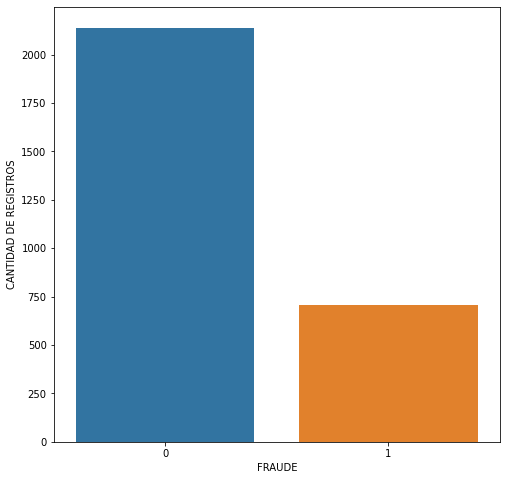

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x='FRAUDE', data=df)
plt.ylabel("CANTIDAD DE REGISTROS")
plt.show()

Se nota que los datos están altamente desbalanceados esto puede ser un gran problema para el modelo por lo tanto se procede a una técnica de Balance SMOTE

In [ ]:
X = df.drop(["FRAUDE"], axis=1)
y = df['FRAUDE']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X1 = pd.concat([X_train, y_train], axis=1)

In [ ]:
not_fr = X1[X1.FRAUDE==0]
fr= X1[X1.FRAUDE==1]

In [ ]:
from sklearn.utils import resample

In [ ]:
# Clase menor sin muestreo
fr_upsampled = resample(not_fr,
                          replace=True, #Muestreo con reempalzo
                          n_samples=len(fr), #Coincidencia en la clase mayoritaria
                          random_state=27) # Reproducibilidad de los datos.

In [ ]:
upsampled = pd.concat([fr, fr_upsampled])

In [ ]:
upsampled

In [ ]:
upsampled

,VALOR,HORA_AUX,Canal1,COD_PAIS,DIASEM,DIAMES,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_NAL,Dist_HOY,FRAUDE
1622,249819.15,1,ATM_INT,EC,4,21,188.0,M,Personal Plus,36.0,7000000.0,2,23.31,904.81,1
2276,490014.69,1,ATM_INT,US,3,6,60.0,F,Personal Plus,39.0,900000.0,1,304.29,4552.41,1
157,1690354.64,20,ATM_INT,US,4,14,230.0,M,Personal Plus,29.0,2000000.0,1,176.85,4552.41,1
1726,278433.06,17,POS,US,5,8,400.0,M,Personal Plus,30.0,650000.0,2,304.29,4552.41,1
1513,238166.95,23,ATM_INT,EC,1,11,30.0,F,Personal Plus,27.0,1700000.0,1,0.00,904.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,459719.96,20,POS,US,4,21,961.0,M,Preferencial,57.0,727000.0,2,253.16,4552.41,0
1430,213797.03,13,POS,US,3,6,291.0,M,Emprendedor,42.0,3500000.0,1,193.87,4552.41,0
1056,141464.03,20,POS,US,3,13,541.0,F,Personal Plus,27.0,1500000.0,2,127.58,4552.41,0
1440,216666.08,16,POS,US,2,5,178.0,M,Preferencial,41.0,5000000.0,1,56.74,4552.41,0


In [ ]:
upsampled.FRAUDE.value_counts()

1    569
0    569
Name: FRAUDE, dtype: int64

In [ ]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
from collections import Counter
print ("Distribucion de las clases de las etiquetas antes del remuestreo {}".format(Counter(y_train)))
print ("Distribucion de las clases de las etiquetas despues del remuestreo {}".format(Counter(y_train_res)))

Distribucion de las clases de las etiquetas antes del remuestreo Counter({0: 1709, 1: 569})
Distribucion de las clases de las etiquetas despues del remuestreo Counter({0: 1622, 1: 1622})


In [ ]:
# Se debe cambiar el tipo de datos dado que presentaba un problema de conversión en la estandarización.

df[["SEGMENTO_Personal Plus"]] = df[["SEGMENTO_Personal Plus"]].astype("int")


**Estandarización de Datos**

Para los algoritmos de Machine learning es más fácil entender los datos que se encuentren bajo una misma escala


In [ ]:
df.head()

,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,DIASEM,DIAMES,OFICINA_VIN,EDAD,INGRESOS,EGRESOS,...,DIA_VIN_22,DIA_VIN_23,DIA_VIN_24,DIA_VIN_25,DIA_VIN_26,DIA_VIN_27,DIA_VIN_28,DIA_VIN_29,DIA_VIN_30,DIA_VIN_31
0,1,0.00,13,659.13,5,1,392.00,29.00,1200000.00,1200000.00,...,0,0,0,0,0,0,0,0,0,0
1,1,0.00,17,594.77,5,15,716.00,29.00,5643700.00,500000.00,...,0,0,0,0,0,0,0,0,0,0
2,1,0.00,13,659.13,5,1,392.00,29.00,1200000.00,1200000.00,...,0,0,0,0,0,0,0,0,0,0
3,1,0.00,13,659.13,5,1,392.00,29.00,1200000.00,1200000.00,...,0,0,0,0,0,0,0,0,0,0
4,1,0.00,0,1.00,0,10,788.00,25.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.fit_transform(X_test) 

**4.Modelado**

**Regresión Logistica**

Cuando se tiene un problema de clasificación Binaria, el primer algoritmo que se puede probar es la regresión Logística

In [ ]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
pred = model.predict(X)


confirmamos que tan  bueno fue el modelo usando model.score() que nos devuelve la precisión media de las predicciones.

In [ ]:
model.score(X,y)

**Árboles de Decisión**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_res, y_train_res)

In [ ]:
from sklearn.metrics import recall_score

# Predecimos sobre nuestro set de entrenamieto
y_train_pred1 = tree.predict(X_train_res)

# Predecimos sobre nuestro set de test
y_test_pred1 = tree.predict(X_test)

# Comaparamos con las etiquetas reales en test
from sklearn.metrics import classification_report
print (classification_report(y_test, y_test_pred1))